In [172]:
#Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

USD_TO_VND = 27000
VND_TO_MILLION = 1000000

In [173]:
pd.set_option('display.max_columns', None)

In [174]:
df = pd.read_csv("topcv.csv", encoding="utf-8-sig")
df.head(5)

,_id,title,company,salary[0],salary[1],location[0],location[1],experience[0],experience[1],company_name[0],company_name[1],company_scale[0],company_scale[1],company_field[0],company_field[1],company_address[0],company_address[1],company_address[2],deadline[0],deadline[1],tags.Yêu cầu:[0],tags.Yêu cầu:[1],tags.Yêu cầu:[2],tags.Yêu cầu:[3],tags.Yêu cầu:[4],tags.Yêu cầu:[5],tags.Yêu cầu:[6],tags.Yêu cầu:[7],tags.Yêu cầu:[8],tags.Yêu cầu:[9],tags.Yêu cầu:[10],tags.Quyền lợi:[0],tags.Quyền lợi:[1],tags.Quyền lợi:[2],tags.Chuyên môn:[0],tags.Chuyên môn:[1],tags.Chuyên môn:[2],tags.Chuyên môn:[3],tags.Chuyên môn:[4],tags.Chuyên môn:[5],tags.Chuyên môn:[6],tags.Chuyên môn:[7],tags.Chuyên môn:[8],tags.Chuyên môn:[9],tags.Chuyên môn:[10],descriptions.Mô tả công việc,descriptions.Yêu cầu ứng viên,descriptions.Quyền lợi,descriptions.Địa điểm làm việc (đã được cập nhật theo Danh mục Hành chính mới),descriptions.Thời gian làm việc,descriptions.Cách thức ứng tuyển,source,crawl_at,descriptions.Thu nhập,descriptions.Địa điểm làm việc
0,694411612e8929610b079c85,Chuyên Viên Phân Tích Nghiệp Vụ Phần Mềm (Yêu ...,CÔNG TY CỔ PHẦN MISA,Mức lương,Tới 25 triệu,Địa điểm,Hà Nội,Kinh nghiệm,1 năm,Công ty Cổ phần MISA,NaN,Quy mô:,3000+ nhân viên,Lĩnh vực:,IT - Phần mềm,Địa điểm:,"Tầng 9 tòa nhà Technosoft ngõ 15 Duy Tân, Dịch...",NaN,Hạn nộp hồ sơ:,03/01/2026,1 năm kinh nghiệm,Đại Học trở lên,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nghỉ thứ 7,Bảo hiểm xã hội,Du lịch hàng năm,Business Analyst (Phân tích nghiệp vụ),Tài chính,Kế toán,Kiểm toán,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Khảo sát và tiếp nhận thông tin về luồng nghiệ...,Tốt nghiệp ĐH trở lên các chuyên ngành về Kế t...,"Nền tảng vững chắc cho phát triển sự nghiệp, t...","- Hà Nội: Tòa nhà Technosoft, Ngõ 15 Duy Tân, ...",Thứ 2 - Thứ 6 (từ 08:00 đến 17:30),Ứng viên nộp hồ sơ trực tuyến bằng cách bấm Ứn...,topcv,2025-12-18T21:36:17.701Z,NaN,NaN
1,6944116a2e8929610b079c86,Chuyên Viên Kiểm Thử,CÔNG TY TNHH TỔNG CÔNG TY CÔNG NGHỆ & GIẢI PHÁ...,Mức lương,Thoả thuận,Địa điểm,Hà Nội,Kinh nghiệm,1 năm,Công ty TNHH Tổng công ty Công nghệ & Giải phá...,NaN,Quy mô:,500-1000 nhân viên,Lĩnh vực:,IT - Phần mềm,Địa điểm:,"Tầng 14 & 16, tòa nhà CMC, Duy Tân, Hà Nội, Vi...",NaN,Hạn nộp hồ sơ:,28/02/2026,1 năm kinh nghiệm,Đại Học trở lên,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nghỉ thứ 7,NaN,NaN,Chuyên môn khác,IT - Phần cứng và máy tính,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"• Lập kế hoạch kiểm thử • Nghiên cứu, phân tíc...",• Tốt nghiệp Đại học trở lên chuyên ngành CNTT...,THU NHẬP Lương tháng thỏa thuận theo năng lực ...,"- Hà Nội: 11 Duy Tân, Phường Cầu Giấy",Thứ 2 - Thứ 6 (từ 08:15 đến 17:30),Ứng viên nộp hồ sơ trực tuyến bằng cách bấm Ứn...,topcv,2025-12-18T21:36:26.653Z,NaN,NaN
2,6944116f2e8929610b079c87,Microsoft 365 Solutions Specialist - Salary Up...,CÔNG TY TNHH PHẦN MỀM ALLIANCE,Mức lương,40 - 60 triệu,Địa điểm,Hồ Chí Minh (mới),Kinh nghiệm,5 năm,CÔNG TY TNHH PHẦN MỀM ALLIANCE,NaN,Quy mô:,10-24 nhân viên,Lĩnh vực:,IT - Phần mềm,Địa điểm:,"Căn B7-D1.TMDV.02, Lô B7, Lumière Boulevard, S...",NaN,Hạn nộp hồ sơ:,16/01/2026,5 năm kinh nghiệm,Đại Học trở lên,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Software Engineer,IT - Phần mềm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Role Summary: Lead the digital transformation ...,"• Bachelor’s degree in IT, Business, Engineeri...","• Competitive monthly salary: 40M - 60M, depen...","- Hồ Chí Minh: Căn B7-D1.TMDV.02, Lô B7, Lumiè...",NaN,Ứng viên nộp hồ sơ trực tuyến bằng cách bấm Ứn...,topcv,2025-12-18T21:36:31.721Z,NaN,NaN
3,6944118a2e8929610b079c88,CVCC/Chuyên Gia Phân Tích Nghiệp Vụ (BA Biz) -...,NGÂN HÀNG TMCP HÀNG HẢI VIỆT NAM (MSB),Mức lương,Thoả thuận,Địa điểm,Hà Nội,Kinh nghiệm,3 năm,Ngân hàng TMCP Hàng Hải Việt Nam (MSB),Pro Company,Quy mô:,5000+ nhân viên,Lĩnh vực:,Ngân hàng,Địa điểm:,"ROX Tower, 54A Nguyễn Chí Thanh, phường Láng T...",NaN,Hạn nộp hồ sơ:,15/01/2026,3 năm kinh nghiệm,Đại Học trở lên,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nghỉ thứ 7,NaN,NaN,Business Analyst (Phân tích 

In [175]:
df.columns.to_list()


['_id',
 'title',
 'company',
 'salary[0]',
 'salary[1]',
 'location[0]',
 'location[1]',
 'experience[0]',
 'experience[1]',
 'company_name[0]',
 'company_name[1]',
 'company_scale[0]',
 'company_scale[1]',
 'company_field[0]',
 'company_field[1]',
 'company_address[0]',
 'company_address[1]',
 'company_address[2]',
 'deadline[0]',
 'deadline[1]',
 'tags.Yêu cầu:[0]',
 'tags.Yêu cầu:[1]',
 'tags.Yêu cầu:[2]',
 'tags.Yêu cầu:[3]',
 'tags.Yêu cầu:[4]',
 'tags.Yêu cầu:[5]',
 'tags.Yêu cầu:[6]',
 'tags.Yêu cầu:[7]',
 'tags.Yêu cầu:[8]',
 'tags.Yêu cầu:[9]',
 'tags.Yêu cầu:[10]',
 'tags.Quyền lợi:[0]',
 'tags.Quyền lợi:[1]',
 'tags.Quyền lợi:[2]',
 'tags.Chuyên môn:[0]',
 'tags.Chuyên môn:[1]',
 'tags.Chuyên môn:[2]',
 'tags.Chuyên môn:[3]',
 'tags.Chuyên môn:[4]',
 'tags.Chuyên môn:[5]',
 'tags.Chuyên môn:[6]',
 'tags.Chuyên môn:[7]',
 'tags.Chuyên môn:[8]',
 'tags.Chuyên môn:[9]',
 'tags.Chuyên môn:[10]',
 'descriptions.Mô tả công việc',
 'descriptions.Yêu cầu ứng viên',
 'descriptions.Q

In [176]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 55 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   _id                                                                             1080 non-null   object
 1   title                                                                           1080 non-null   object
 2   company                                                                         1080 non-null   object
 3   salary[0]                                                                       1080 non-null   object
 4   salary[1]                                                                       1080 non-null   object
 5   location[0]                                                                     1080 non-null   object
 6   location[1]             

,_id,title,company,salary[0],salary[1],location[0],location[1],experience[0],experience[1],company_name[0],company_name[1],company_scale[0],company_scale[1],company_field[0],company_field[1],company_address[0],company_address[1],company_address[2],deadline[0],deadline[1],tags.Yêu cầu:[0],tags.Yêu cầu:[1],tags.Yêu cầu:[2],tags.Yêu cầu:[3],tags.Yêu cầu:[4],tags.Yêu cầu:[5],tags.Yêu cầu:[6],tags.Yêu cầu:[7],tags.Yêu cầu:[8],tags.Yêu cầu:[9],tags.Yêu cầu:[10],tags.Quyền lợi:[0],tags.Quyền lợi:[1],tags.Quyền lợi:[2],tags.Chuyên môn:[0],tags.Chuyên môn:[1],tags.Chuyên môn:[2],tags.Chuyên môn:[3],tags.Chuyên môn:[4],tags.Chuyên môn:[5],tags.Chuyên môn:[6],tags.Chuyên môn:[7],tags.Chuyên môn:[8],tags.Chuyên môn:[9],tags.Chuyên môn:[10],descriptions.Mô tả công việc,descriptions.Yêu cầu ứng viên,descriptions.Quyền lợi,descriptions.Địa điểm làm việc (đã được cập nhật theo Danh mục Hành chính mới),descriptions.Thời gian làm việc,descriptions.Cách thức ứng tuyển,source,crawl_at,descriptions.Thu nhập,descriptions.Địa điểm làm việc
count,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,75,1080,1080,1080,1080,1080,1080,2,1080,1080,1070,1070,373,149,30,13,3,2,2,1,1,716,314,291,1070,814,475,281,89,70,37,22,8,3,2,1070,713,274,241,217,243,1080,1080,21,2
unique,1080,868,755,2,202,1,37,1,8,760,1,1,9,1,37,1,767,2,1,56,8,6,103,21,14,8,3,2,2,1,1,11,15,16,98,38,44,38,7,6,5,4,3,2,2,996,660,225,179,85,1,1,1080,17,1
top,694531e5934087615cc3f84e,Nhân Viên Thiết Kế,CÔNG TY CỔ PHẦN CÔNG NGHỆ ALPHAWAY,Mức lương,Thoả thuận,Địa điểm,Hà Nội,Kinh nghiệm,1 năm,CÔNG TY CỔ PHẦN CÔNG NGHỆ ALPHAWAY,Pro Company,Quy mô:,25-99 nhân viên,Lĩnh vực:,IT - Phần mềm,Địa điểm:,"Tầng 4, tòa 21T1 Hapulico, số 83 Vũ Trọng Phụn...","Hồ Chí Minh: Tầng 5, 89 Vạn Kiếp, Phường 3, Q....",Hạn nộp hồ sơ:,31/12/2025,1 năm kinh nghiệm,Đại Học trở lên,Nam,Nam,Diễn đạt trôi chảy,Diễn đạt trôi chảy,Tiếng Anh TOEIC 750,Tiếng Anh TOEIC 700,Tiếng Anh TOEIC 650,Tiếng Anh Giao tiếp thành thạo,Có phương tiện di chuyển,Nghỉ thứ 7,Bảo hiểm xã hội,Bảo hiểm sức khỏe,Thiết kế đồ họa (Graphic Design),IT - Phần mềm,IT - Phần mềm,Marketing / Quảng cáo,B2B,Direct Sales,Online Sales,Telesales,Bán hàng tại cửa hàng/showroom,Online Sales,Direct Sales,About NAVER Corp and NAVER Vietnam: NAVER Corp...,"• Bachelor’s degree in IT, Business, Engineeri...","Company culture is simple, sincere, co-workers...","- Hồ Chí Minh: Thạnh Mỹ Lợi, Phường Cát Lái",Thứ 2 - Thứ 6 (từ 08:00 đến 17:00),Ứng viên nộp hồ sơ trực tuyến bằng cách bấm Ứn...,topcv,2025-12-19T18:07:17.856Z,Thu nhập khi đạt 100% KPI: 10 - 20 triệu VND T...,"- Tầng 19, số 266 Đội Cấn, Phường Liễu Giai, Q..."
freq,1,22,21,933,431,1080,668,1080,276,17,75,1080,380,1080,502,1080,17,1,1080,110,270,614,51,58,6,3,1,1,1,1,1,537,143,78,271,344,58,29,38,20,12,7,5,2,1,3,2,3,3,42,243,1080,1,2,2


In [177]:
df = df[[
    'tags.Chuyên môn:[0]',
    'deadline[1]',
    'salary[1]',
    'location[1]'
]]
df

,tags.Chuyên môn:[0],deadline[1],salary[1],location[1]
0,Business Analyst (Phân tích nghiệp vụ),03/01/2026,Tới 25 triệu,Hà Nội
1,Chuyên môn khác,28/02/2026,Thoả thuận,Hà Nội
2,Software Engineer,16/01/2026,40 - 60 triệu,Hồ Chí Minh (mới)
3,Business Analyst (Phân tích nghiệp vụ),15/01/2026,Thoả thuận,Hà Nội
4,Kinh doanh phần mềm,15/01/2026,Từ 20 triệu,Hồ Chí Minh (mới)
...,...,...,...,...
1075,Cloud Engineer,31/12/2025,23 - 27 triệu,Hà Nội
1076,Thiết kế đồ họa (Graphic Design),24/12/2025,Thoả thuận,Hồ Chí Minh (mới)
1077,Network Engineer,24/12/2025,Thoả thuận,Hà Nội
1078,Thiết kế đồ họa (Graphic Design),24/12/2025,4 - 6 triệu,Hà Nội


tags.Chuyên môn:[0]    10
deadline[1]             0
salary[1]               0
location[1]             0
dtype: int64


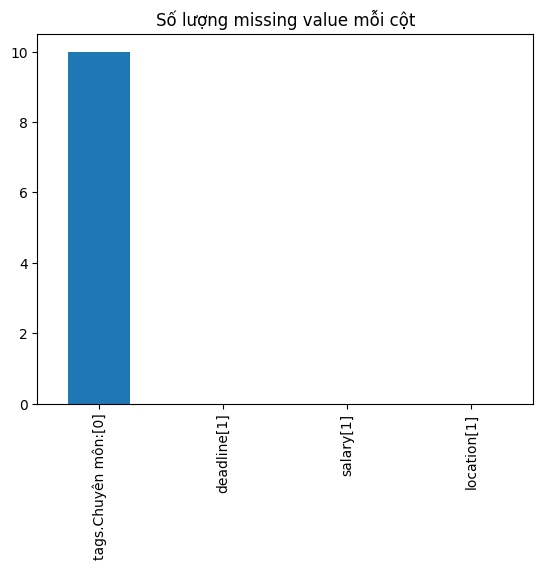

In [178]:
missing = df.isnull().sum()
print(missing)

# Vẽ biểu đồ missing
missing.plot(kind='bar')
plt.title("Số lượng missing value mỗi cột")
plt.show()

In [179]:
df_clean = df.rename(columns={
    'tags.Chuyên môn:[0]' : 'job_title',
    'deadline[1]' : 'date',
    'salary[1]' : 'salary',
    'location[1]' : 'location'
})

In [180]:
df_clean

,job_title,date,salary,location
0,Business Analyst (Phân tích nghiệp vụ),03/01/2026,Tới 25 triệu,Hà Nội
1,Chuyên môn khác,28/02/2026,Thoả thuận,Hà Nội
2,Software Engineer,16/01/2026,40 - 60 triệu,Hồ Chí Minh (mới)
3,Business Analyst (Phân tích nghiệp vụ),15/01/2026,Thoả thuận,Hà Nội
4,Kinh doanh phần mềm,15/01/2026,Từ 20 triệu,Hồ Chí Minh (mới)
...,...,...,...,...
1075,Cloud Engineer,31/12/2025,23 - 27 triệu,Hà Nội
1076,Thiết kế đồ họa (Graphic Design),24/12/2025,Thoả thuận,Hồ Chí Minh (mới)
1077,Network Engineer,24/12/2025,Thoả thuận,Hà Nội
1078,Thiết kế đồ họa (Graphic Design),24/12/2025,4 - 6 triệu,Hà Nội


In [181]:
def clean_job_title(title):
    if pd.isna(title):
        return title
    
    s = str(title)
    
    # 1. Bỏ số + dấu phẩy ở đầu
    s = re.sub(r'^\d+,\s*', '', s)
    
    # 2. Bỏ tất cả nội dung trong () và []
    s = re.sub(r'\(.*?\)', '', s)
    s = re.sub(r'\[.*?\]', '', s)
    
    # 3. Bỏ các từ khóa tuyển dụng dư thừa
    s = re.sub(r'Tuyển Dụng|TUYỂN DỤNG', '', s, flags=re.IGNORECASE)
    
    # 4. Bỏ ký tự _ hoặc - dư
    s = re.sub(r'[_\-]+', ' ', s)
    
    # 5. Chuẩn hóa khoảng trắng
    s = re.sub(r'\s+', ' ', s)
    return s

In [182]:
df_cl_title = df_clean
df_cl_title['job_title'] = df_cl_title['job_title'].apply(clean_job_title)
df_cl_title.dropna(subset=['job_title'], inplace=True)
df_cl_title.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_title  1070 non-null   object
 1   date       1070 non-null   object
 2   salary     1070 non-null   object
 3   location   1070 non-null   object
dtypes: object(4)
memory usage: 41.8+ KB


In [183]:
def format_date(date):
    if pd.isna(date):
        return pd.NaT

    date = str(date)

    # Book3 – ISO 8601
    if 'T' in date:
        return pd.to_datetime(date, errors='coerce').date()

    # Book1, Book2 – dd/mm/yyyy
    return pd.to_datetime(date, format="%d/%m/%Y", errors='coerce').date()

In [184]:
df_cl_date = df_cl_title
df_cl_date['date'] = df_cl_date['date'].apply(format_date)
df_cl_date.dropna(subset=['date'], inplace = True)

df_cl_date

,job_title,date,salary,location
0,Business Analyst,2026-01-03,Tới 25 triệu,Hà Nội
1,Chuyên môn khác,2026-02-28,Thoả thuận,Hà Nội
2,Software Engineer,2026-01-16,40 - 60 triệu,Hồ Chí Minh (mới)
3,Business Analyst,2026-01-15,Thoả thuận,Hà Nội
4,Kinh doanh phần mềm,2026-01-15,Từ 20 triệu,Hồ Chí Minh (mới)
...,...,...,...,...
1075,Cloud Engineer,2025-12-31,23 - 27 triệu,Hà Nội
1076,Thiết kế đồ họa,2025-12-24,Thoả thuận,Hồ Chí Minh (mới)
1077,Network Engineer,2025-12-24,Thoả thuận,Hà Nội
1078,Thiết kế đồ họa,2025-12-24,4 - 6 triệu,Hà Nội


In [185]:
def salary_shortcut(salary):
    if pd.isna(salary):
        return np.nan
    
    s = str(salary).lower()
    
    if any(x in s for x in ['thỏa thuận', 'thương lượng', 'cạnh tranh']):
        return np.nan
    
    nums = re.findall(r'\d+[.,]?\d*', s)
    nums = [float(n.replace(',', '')) for n in nums]
    
    if not nums:
        return np.nan
    
    max_value = max(nums)
    
    if 'triệu' in s or 'tr' in s:
        return max_value
    
    if 'usd' in s or '$' in s:
        return round(((max_value * 27000) / 1000000), 2)
    
    
    return np.nan

In [186]:
df_cl_salary = df_cl_date
df_cl_salary['salary'] = df_cl_salary['salary'].apply(salary_shortcut)
df_cl_salary.dropna(subset=['salary'], inplace = True)

df_cl_salary

,job_title,date,salary,location
0,Business Analyst,2026-01-03,25.0,Hà Nội
2,Software Engineer,2026-01-16,60.0,Hồ Chí Minh (mới)
4,Kinh doanh phần mềm,2026-01-15,20.0,Hồ Chí Minh (mới)
5,UI/UX Design,2025-12-31,50.0,Hà Nội
6,Thiết kế đồ họa,2026-01-16,20.0,Hồ Chí Minh (mới)
...,...,...,...,...
1073,Kinh doanh phần mềm,2025-12-31,60.0,Hà Nội
1074,Kinh doanh phần mềm,2025-12-24,40.0,Hà Nội
1075,Cloud Engineer,2025-12-31,27.0,Hà Nội
1078,Thiết kế đồ họa,2025-12-24,6.0,Hà Nội


In [187]:
def location_clean(location):
    if pd.isna(location):
        return np.nan
    
    s = str(location)
    
    # 1. Bỏ nội dung trong ngoặc ()
    s = re.sub(r'\(.*?\)', '', s)
    
    # 2. Nếu có nhiều địa điểm, lấy cái đầu tiên
    s = s.split(',')[0]
    
    # 3. Chuẩn hóa khoảng trắng
    s = re.sub(r'\s+', ' ', s)
    
    return s.strip()

In [188]:
df_cl_location = df_cl_salary
df_cl_location['location'] = df_cl_location['location'].apply(location_clean)
df_cl_location.dropna(subset=['location'], inplace = True)
df_cl_location

,job_title,date,salary,location
0,Business Analyst,2026-01-03,25.0,Hà Nội
2,Software Engineer,2026-01-16,60.0,Hồ Chí Minh
4,Kinh doanh phần mềm,2026-01-15,20.0,Hồ Chí Minh
5,UI/UX Design,2025-12-31,50.0,Hà Nội
6,Thiết kế đồ họa,2026-01-16,20.0,Hồ Chí Minh
...,...,...,...,...
1073,Kinh doanh phần mềm,2025-12-31,60.0,Hà Nội
1074,Kinh doanh phần mềm,2025-12-24,40.0,Hà Nội
1075,Cloud Engineer,2025-12-31,27.0,Hà Nội
1078,Thiết kế đồ họa,2025-12-24,6.0,Hà Nội


In [190]:
cleaned_df = df_cl_location.drop_duplicates(keep='first').reset_index(drop=True)

cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   job_title  559 non-null    object 
 1   date       559 non-null    object 
 2   salary     559 non-null    float64
 3   location   559 non-null    object 
dtypes: float64(1), object(3)
memory usage: 17.6+ KB


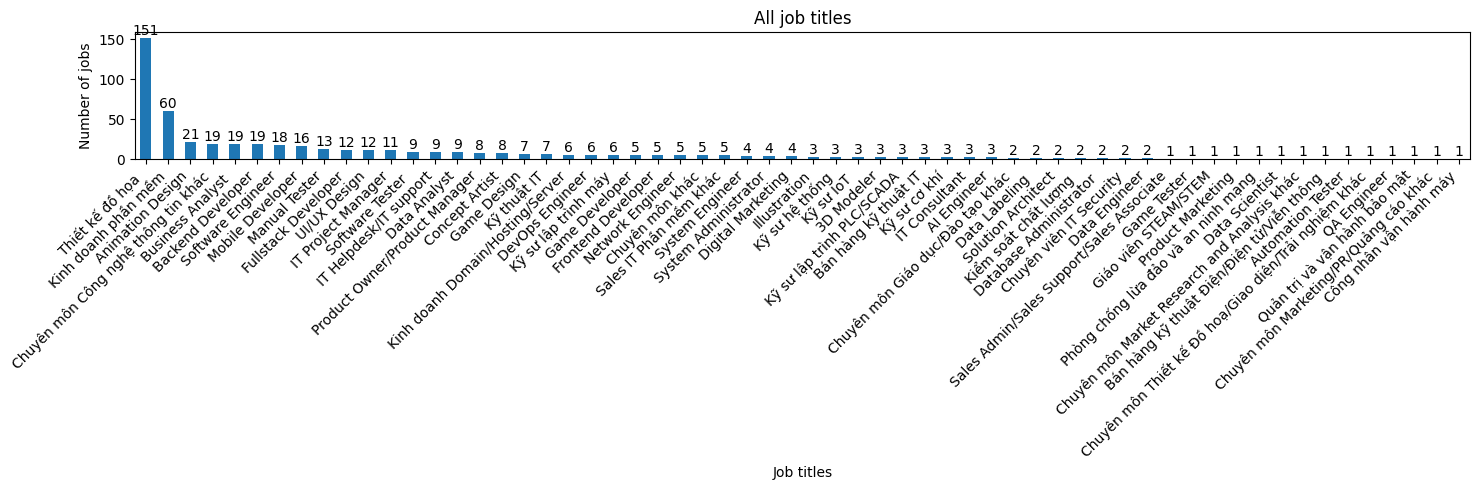

In [191]:
job_count = cleaned_df['job_title'].value_counts().head(60)
fig, ax = plt.subplots(figsize=(15, 5))
job_count.plot(kind='bar', ax = ax)
ax.set_title('All job titles')
ax.set_xlabel('Job titles')
ax.set_ylabel('Number of jobs')

ax.bar_label(ax.containers[0])
 
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

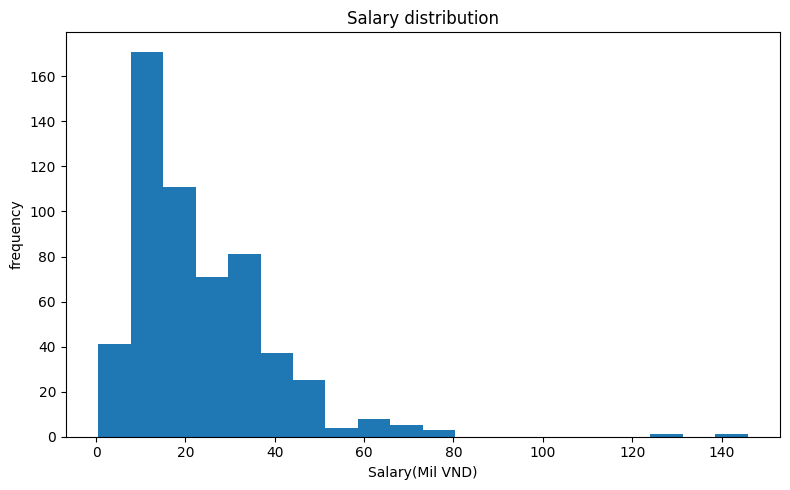

In [192]:
salary_filtered = cleaned_df['salary'][cleaned_df['salary'] < 200]
plt.figure(figsize=(8, 5))
salary_filtered.dropna().plot(kind = 'hist', bins = 20)
plt.title('Salary distribution')
plt.xlabel('Salary(Mil VND)')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

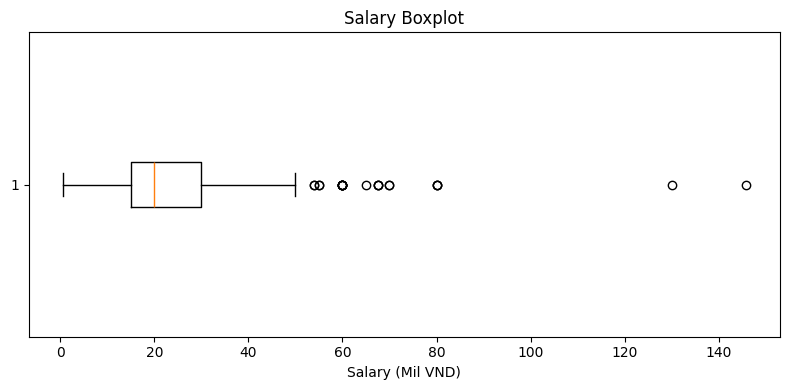

In [193]:
plt.figure(figsize=(8, 4))
plt.boxplot(
    cleaned_df['salary'][cleaned_df['salary'] < 200],
    vert=False
)
plt.title('Salary Boxplot')
plt.xlabel('Salary (Mil VND)')
plt.tight_layout()
plt.show()


<Figure size 1200x500 with 0 Axes>

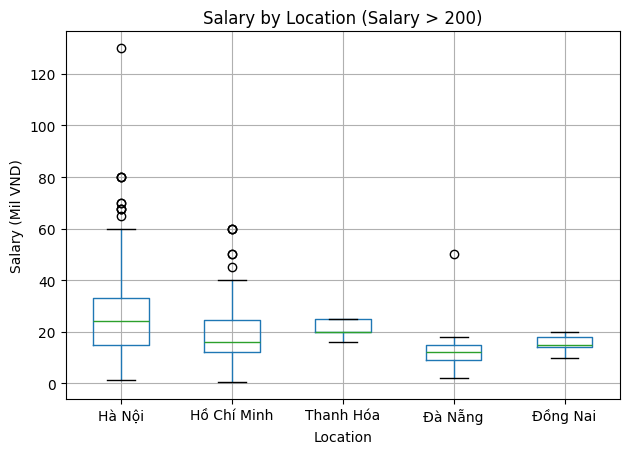

In [194]:
top_locations = cleaned_df['location'].value_counts().head(5).index

data = cleaned_df[
    (cleaned_df['location'].isin(top_locations)) &
    (cleaned_df['salary'] < 200)
]

plt.figure(figsize=(12, 5))

data.boxplot(
    column='salary',
    by='location'
)

plt.title('Salary by Location (Salary > 200)')
plt.suptitle('')
plt.xlabel('Location')
plt.ylabel('Salary (Mil VND)')
plt.tight_layout()
plt.show()
